----
### 03. Feature Engineering

**Objective:** The aim is to engineer new features from the existing ones. This engineering is `based EDA results` and the nature of features. This will enhance models’ ability to capture subtle hidden patterns and trends improving prediction capabilities.

---

Based on the EDA, the following groups of features are candidates for engineering, rationale and engineering methods are also documented:


| Group                                                      | Feature Names                                     | Rationale                                                                                                                                                                                                | Suitable Engineering                                                                                            |
| ---------------------------------------------------------- | ------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| 1. Strong Predictors Features with non-overlapping medians | `V4, V9, V10, V11, V12, V14, V16, V17`            | These features already show good separation between classes, i.e., they tend to occupy different ranges. Transformations can **enhance this separation** and make the difference between classes clearer. | Absolute value transformation (non-monotonic)                                                                   |
| **1a. Strongest Predictors (subset of strong predictors)** | **`V4, V11, V12, V14`**                           | These features exhibit the **largest interquartile range (IQR) separation** between fraud and non-fraud classes based on boxplot analysis, indicating the **strongest discrimination**.    | **Squaring transformation (`x²`) to amplify separation and capture non-linear effects (non-monotonic)**         |
| 2. Highly concentrated (low variance) predictors           | `V2, V5, V7, V8, V20, V21, V23, V27, V28, Amount` | Low variance features may be ignored by models sensitive to variance (e.g., linear models). Scaling ensures these features are **considered during training**.                                           | MinMaxScaler                                                                                                    |
| 3. Multimodal feature *                                    | `Time*`                                           | Multiple peaks suggest subtle sub-patterns. Engineering can **capture hidden patterns**.                                                                                                                 | - Feature extraction: hour of day, day segment <br> - Binning into categories (morning/afternoon/evening/night) |


In [1]:
import sys

sys.path.append("../src")
from src.data_loader import load_data
from src.feature_engineering import FeatureEngineer

In [2]:
raw_data = load_data("../data/creditcard.csv")

# split into features and target values
raw_data_X = raw_data.drop(columns = ["Class"])
raw_data_y = raw_data["Class"]

In [3]:
# apply feature engineer class operations on X
engineer = FeatureEngineer()
engineer.fit(raw_data_X)
engineered_X = engineer.transform(raw_data_X)

engineered_X.head()

,V1,V3,V4,V6,V9,V10,V11,V12,V13,V14,...,V7_scaled,V8_scaled,V20_scaled,V21_scaled,V23_scaled,V27_scaled,V28_scaled,Amount_scaled,Hour_of_day,Time_segment
0,-1.359807,2.536347,1.378155,0.462388,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,...,0.266815,0.786444,0.582942,0.561184,0.663793,0.418976,0.312697,0.005824,0.0,early_morning
1,1.191857,0.166480,0.448154,-0.082361,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,...,0.264875,0.786298,0.579530,0.557840,0.666938,0.416345,0.313423,0.000105,0.0,early_morning
2,-1.358354,1.773209,0.379780,1.800499,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,...,0.270177,0.788042,0.585855,0.565477,0.678939,0.415489,0.311911,0.014739,0.0,early_morning
3,-0.966272,1.792993,-0.863291,1.247203,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,...,0.266803,0.789434,0.578050,0.559734,0.662607,0.417669,0.314371,0.004807,0.0,early_morning
4,-1.158233,1.548718,0.403034,0.095921,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,...,0.268968,0.782484,0.584615,0.561327,0.663392,0.420561,0.317490,0.002724,0.0,early_morning


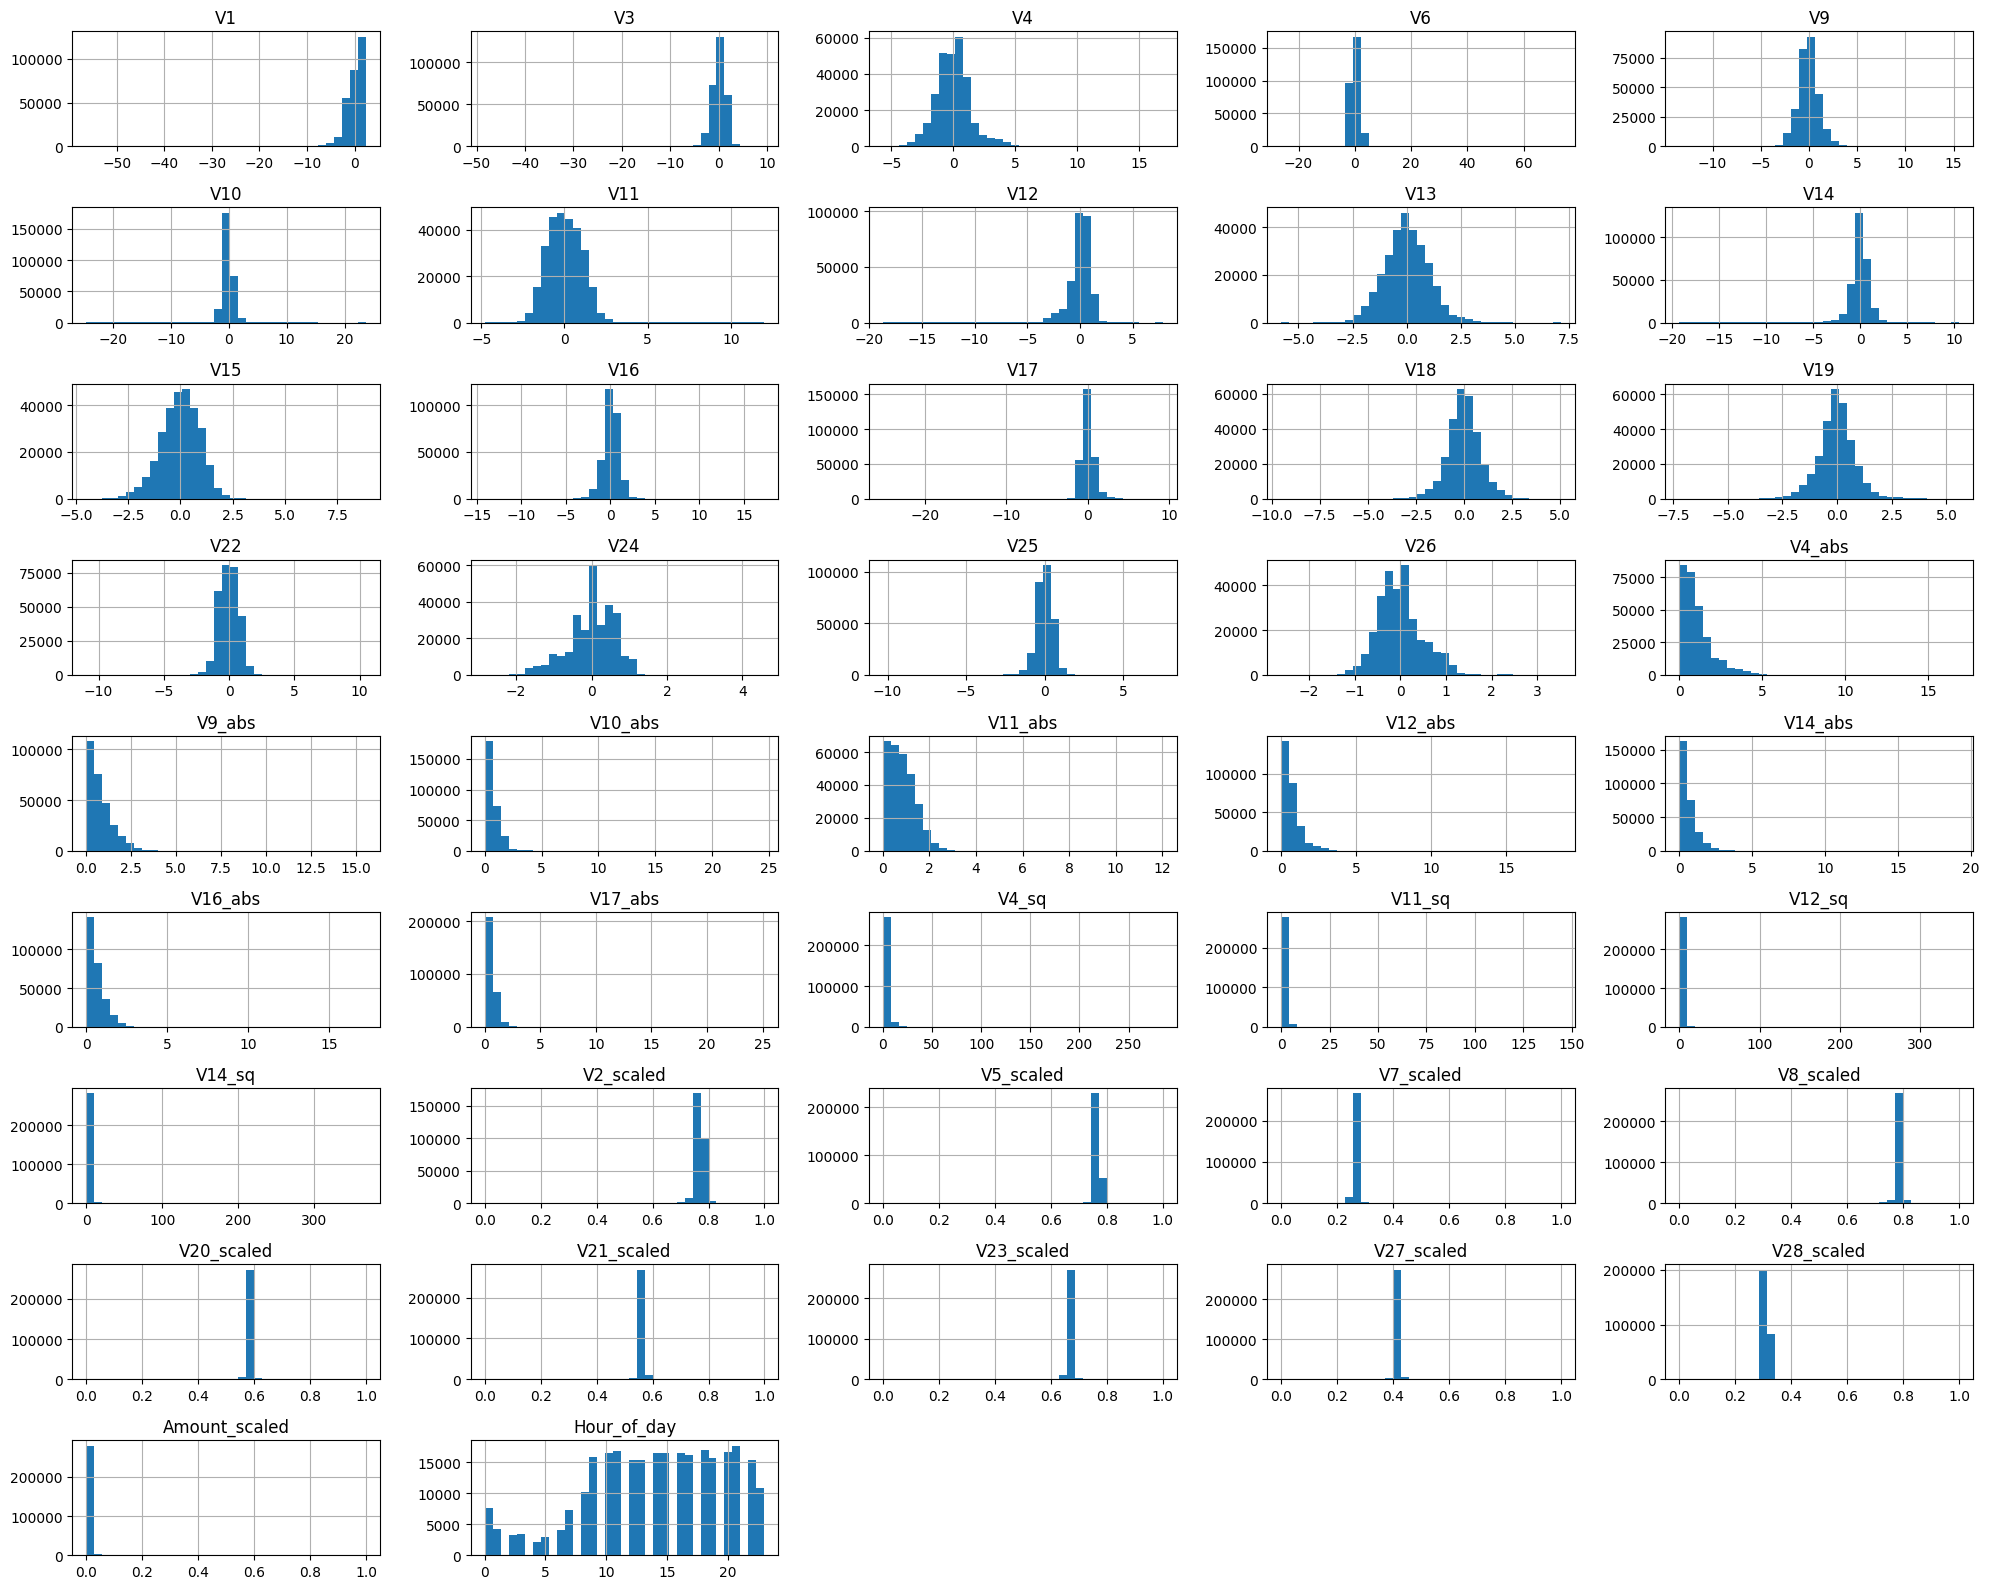

In [5]:
from src.preprocessing import histograms_vis

histograms_vis(engineered_X)

#### Notes on Feature Engineering Decisions

- For **Group 1** features (strong predictors),I will apply **Absolute value transformation** to create new features that amplify the separability of classes exhibited by the original features.

- For Group 1a: Strongest Predictors (subset of strong predictors): `V4, V11, V12`, V14 these features show very noticeable separation between the two classes, as illustrated by the boxplots. Hence, I will engineer new features by taking the squared values of these features to further exploit this separability.

- For **Group 2** Highly concentrated predictors were scaled using Min–Max normalization. This linearly maps each feature to the range of (0-1), preserving the relative spacing.

- For **Group 3** **Time variable** as described by the data provider represents the number of seconds since the first transaction in the dataset across 2 days. It is not clear what time of the day this benchmark "first transaction" occurred. Accordingly, the derived features `hour_of_day` and `time_segment` are approximations of `daily cycles`, they indicate relative time within a day, but not the actual clock time of each transaction.

- After transformation `Highly concentrated` raw features were replaced with their transformed versions. And raw `Time` features was removed as the new engineer features carry the same predictive signal in a clearer way.

-----------
Next Step: Modeling → Train and evaluate models

------------